Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit
Steven Bird, mEwan Klein, and Edward Loper
http://www.nltk.org/book/

# Chapter 04 - Writing Structured Programs

## 4.1 Back to the Basics

### Assignment

Assignment would seem to be the most elementary programming concept, not deserving a separate discussion. However, there are some surprising subtleties here. Consider the following code fragment:

In [1]:
foo = 'Monty'

In [2]:
bar = foo

In [3]:
foo = 'Python'

In [4]:
bar

'Monty'

In [5]:
foo = ['Monty', ' Python']

In [6]:
bar = foo

In [7]:
foo[1] = 'Bdokin'

In [8]:
bar

['Monty', 'Bdokin']

In [9]:
empty = []

In [10]:
nested = [empty, empty, empty]

In [11]:
nested

[[], [], []]

In [12]:
nested[1].append('Python')

In [13]:
nested

[['Python'], ['Python'], ['Python']]

In [14]:
nested = [[]] * 3

In [15]:
nested[1].append('Python')

In [16]:
nested[1] = ['Monty']

In [17]:
nested

[['Python'], ['Monty'], ['Python']]

### Equality

Python provides two ways to check that a pair of items are the same. The is operator tests for object identity. We can use it to verify our earlier observations about objects.

In [18]:
size = 5

In [19]:
python = ['Python']

In [20]:
snake_nest = [python] *size

In [21]:
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] ==snake_nest[4]

True

In [22]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

True

In [23]:
import random

In [24]:
position = random.choice(range(size))

In [25]:
snake_nest[position] = ['Python']

In [26]:
snake_nest

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

In [27]:
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] ==snake_nest[4]

True

In [28]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

False

In [37]:
[id(snake) for snake in snake_nest]

[1856308313352, 1856308313352, 1856309277192, 1856308313352, 1856308313352]

### Conditionals

In the condition part of an if statement, a non-empty string or list is evaluated as true,while an empty string or list evaluates as false.

In [30]:
mixed = ['cat', '', ['dog'], []]

In [31]:
for element in mixed:
    if element:
        print (element)

cat
['dog']


In [32]:
animals=['cat','dog']

In [33]:
if 'cat' in animals:
    print (1)
elif 'dog' in animals:
    print (2)

1


In [34]:
sent = ['No', 'good', 'fish','goes','anywhere','without','a','porpoise','.']

In [35]:
all(len(w) > 4 for w in sent)

False

In [36]:
any(len(w) > 4 for w in sent)

True

## 4.2 Sequence

So far, we have seen two kinds of sequence object: strings and lists. Another kind of sequence is called a tuple.

In [38]:
t = 'walk', 'fem', 3

In [39]:
t

('walk', 'fem', 3)

In [40]:
t[0]

'walk'

In [41]:
t[1:]

('fem', 3)

In [42]:
len(t)

3

In [43]:
raw = 'I turned off the spectroroute'

In [44]:
text = ['I', 'turned', 'off', 'the', 'spectroroute']

In [46]:
pair = (6, 'turned')

In [47]:
raw[2], text[3], pair[1]

('t', 'the', 'turned')

In [48]:
raw[-3:], text[-3:], pair[-3:]

('ute', ['off', 'the', 'spectroroute'], (6, 'turned'))

In [50]:
len(raw), len(text), len(pair)

(29, 5, 2)

In [51]:
list(set(text))

['the', 'off', 'turned', 'I', 'spectroroute']

In [52]:
[w for w in set(text)]

['the', 'off', 'turned', 'I', 'spectroroute']

### Operating on Sequence Types

In [53]:
raw = 'Red lorry, yellow, lorry, red lorry, yellow lorry.'

In [54]:
import nltk

In [55]:
text = nltk.word_tokenize(raw)

In [56]:
fdist = nltk.FreqDist(text)

In [57]:
list(fdist)

['Red', 'lorry', ',', 'yellow', 'red', '.']

In [58]:
for key in fdist:
    print(fdist[key])

1
4
4
2
1
1


In [60]:
words = ['I', 'tumed', 'off', 'the', 'spectroroute']

In [61]:
words[2], words[3], words[4] = words[3], words[4], words[2]

In [62]:
words

['I', 'tumed', 'the', 'spectroroute', 'off']

In [63]:
tmp = words[2]

In [64]:
words[2] = words[3]

In [65]:
words[3] = words[4]

In [66]:
words[4] = tmp

In [67]:
words = ['I', 'tumed', 'the', 'spectroroute', 'off']

In [68]:
tags = ['noun', 'verb', 'prep', 'det', 'noun']

In [69]:
zip(words, tags)

In [70]:
list(enumerate(words))

[(0, 'I'), (1, 'tumed'), (2, 'the'), (3, 'spectroroute'), (4, 'off')]

In [71]:
text = nltk.corpus.nps_chat.words()

In [72]:
cut = int(0.9 * len(text))

In [73]:
training_data, test_data = text[:cut], text[cut:]

In [74]:
text == training_data + test_data

True

In [75]:
len(training_data) / len(test_data)

9.0

### Combining Different Sequence Types

Let’s combine our knowledge of these three sequence types, together with list comprehensions,to perform the task of sorting the words in a string by their length.

In [76]:
words = 'I turned off the spectroroute'.split()

In [77]:
wordlens = [(len(word), word) for word in words]

In [78]:
wordlens.sort()

In [79]:
' '.join(w for(_,w) in wordlens)

'I off the turned spectroroute'

In [80]:
lexicon = [('the', 'det', ['Di:', 'D@']),('off', 'prep', ['Qf', 'O:f'])]

In [81]:
lexicon.sort()

In [82]:
lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])

In [83]:
del lexicon[0]

In [84]:
lexicon = tuple(lexicon)

In [85]:
lexicon.sort()

AttributeError: 'tuple' object has no attribute 'sort'

In [86]:
lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])

TypeError: 'tuple' object does not support item assignment

In [87]:
del lexicon[0]

TypeError: 'tuple' object doesn't support item deletion

### Generator Expressions

We’ve been making heavy use of list comprehensions, for compact and readable processing of texts. Here’s an example where we tokenize and normalize a text:

In [91]:
text = '""When I use a word,"Humpty Dumpty said in rather a scornful tone,"it means just what I choose it to mean - neither more nor less.""'

In [92]:
[w.lower() for w in nltk.word_tokenize(text)]

['``',
 '``',
 'when',
 'i',
 'use',
 'a',
 'word',
 ',',
 "''",
 'humpty',
 'dumpty',
 'said',
 'in',
 'rather',
 'a',
 'scornful',
 'tone',
 ',',
 "''",
 'it',
 'means',
 'just',
 'what',
 'i',
 'choose',
 'it',
 'to',
 'mean',
 '-',
 'neither',
 'more',
 'nor',
 'less',
 '.',
 "''",
 "''"]

In [93]:
max([w.lower() for w in nltk.word_tokenize(text)])

'word'

In [94]:
max(w.lower() for w in nltk.word_tokenize(text))

'word'

## 4.3 Questions of Style

Programming is as much an art as a science. The undisputed “bible” of programming,a 2,500 page multivolume work by Donald Knuth, is called The Art of Computer Programming.Many books have been written on Literate Programming, recognizing that humans, not just computers, must read and understand programs.

### Python Coding Style

When writing programs you make many subtle choices about names, spacing, comments,and so on. When you look at code written by other people, needless differences in style make it harder to interpret the code. Therefore, the designers of the Python language have published a style guide for Python code, available at http://www.python.org/dev/peps/pep-0008/.

In [95]:
import re
from nltk.corpus import brown

In [96]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')

In [97]:
cv_word_pairs = [(cv,w) for w in rotokas_words 
                 for cv in re.findall('[ptksvr][aeiou]',w)]

In [98]:
cdf = nltk.ConditionalFreqDist(
    (genre,word) 
    for genre in brown.categories() 
    for word in brown.words(categories=genre)
)

In [99]:
ha_words = ['aaahhhh','ah','ahah','ahahah','ahhahahaha',
            'ahhh','ahhhh', 'ahhhhhh','ahhhhhhhhhhhh','ha',
            'haaa','hah','haha','hahaaa','hahah','hahaha']

In [100]:
syllables = ['aaaaa', 'bbbb', 'ccccc']

In [101]:
if (len(syllables) > 4 and len(syllables[2]) == 3 and 
    syllables[2][2] in [aeiou] and syllables[2][3] == syllables[1][3]):
    process(syllables)

In [102]:
if len(syllables) > 4 and len(syllables[2]) == 3 and \
syllables[2][2] in [aeiou] and syllables[2][3]==syllables[1][3]:
    process(syllables)

### Procedural Versus Declarative Style

We have just seen how the same task can be performed in different ways, with implications for efficiency. Another factor influencing program development is programming style. Consider the following program to compute the average length of words in the Brown Corpus:

In [104]:
tokens = nltk.corpus.brown.words(categories='news')

In [105]:
count = 0
total = 0
for token in tokens:
    count += 1
    total += len(token)
print(total / count)

4.401545438271973


In [106]:
total = sum(len(t) for t in tokens)
print(total / len(tokens))

4.401545438271973


In [ ]:
word_list = []
len_word_list = len(word_list)
i=0
while i < len(tokens):
    j = 0
    while j<len_word_list and word_list[j] < tokens[i]:
        j += 1
    if j==0 or token[i] != word_list[j]:
        word_list.insert(j, tokens[i])
        len_word_list += 1
    i += 1 

In [123]:
word_list = sorted(set(tokens))

In [124]:
fd = nltk.FreqDist(nltk.corpus.brown.words())

In [125]:
cumulative = 0.0

In [126]:
for rank, word in enumerate(fd):
    cumulative += fd[word] * 100 / fd.N()
    print("%3d %6.2f%% %s" % (rank+1, cumulative,word))
    if cumulative > 25:
        break

  1   0.63% The
  2   0.63% Fulton
  3   0.63% County
  4   0.64% Grand
  5   0.64% Jury
  6   0.80% said
  7   0.81% Friday
  8   1.11% an
  9   1.12% investigation
 10   4.22% of
 11   4.22% Atlanta's
 12   4.24% recent
 13   4.25% primary
 14   4.25% election
 15   4.26% produced
 16   5.02% ``
 17   5.18% no
 18   5.19% evidence
 19   5.95% ''
 20   6.83% that
 21   6.94% any
 22   6.94% irregularities
 23   6.98% took
 24   7.03% place
 25  11.28% .
 26  11.28% jury
 27  11.30% further
 28  12.98% in
 29  12.98% term-end
 30  12.98% presentments
 31  18.38% the
 32  18.39% City
 33  18.39% Executive
 34  18.40% Committee
 35  23.42% ,
 36  23.73% which
 37  24.17% had
 38  24.17% over-all
 39  24.18% charge
 40  24.18% deserves
 41  24.18% praise
 42  26.59% and


In [127]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')

In [128]:
longest = ""

In [129]:
for word in text:
    if len(word) > len(longest):
        longest = word

In [130]:
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen]

['unextinguishable',
 'transubstantiate',
 'inextinguishable',
 'incomprehensible']

### Some Legitimate Users for Counters

There are cases where we still want to use loop variables in a list comprehension. For example, we need to use a loop variable to extract successive overlapping n-grams from a list:

In [131]:
import pprint

In [132]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']

In [133]:
n = 3

In [135]:
[sent[i:i+n] for i in range(len(sent) - n + 1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

In [136]:
m, n = 3, 7

In [137]:
array = [[set() for i in range(n)] for j in range(m)]

In [138]:
array[2][5].add('Alice')

In [139]:
pprint.pprint(array)

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), {'Alice'}, set()]]


In [140]:
array = [[set()] * n] * m

In [141]:
array[2][5].add(7)

In [142]:
array

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]

## 4.4 Functions:The Foundation of Structured Programming

Functions provide an effective way to package and reuse program code. For example, suppose we find that we often want to read text from an HTML file. This involves several steps: opening the file, reading it in, normalizing whitespace, and stripping HTML markup.

In [143]:
import re

In [144]:
def get_text(file):
    '"""Read text from a file, normalizing whitespace and stripping HTML markup"""'
    text = open(file).read()
    text = re.sub('\s','', text)
    text = re.sub(r'<.*?>', '', text)
    return text

In [145]:
help(get_text)

Help on function get_text in module __main__:

get_text(file)
    """Read text from a file, normalizing whitespace and stripping HTML markup"""



### Function Inputs and Outputs

We pass information to functions using a function’s parameters, the parenthesized list of variables and constants following the function’s name in the function definition.

In [146]:
def repeat(msg, num):
    return ''.join([msg] * num)

In [147]:
monty = 'Monty Python'

In [148]:
repeat(monty, 3)

'Monty PythonMonty PythonMonty Python'

In [149]:
def monty():
    return "Monty Python"

In [150]:
monty()

'Monty Python'

In [151]:
repeat(monty(), 3)

'Monty PythonMonty PythonMonty Python'

In [152]:
repeat('Monty Python', 3)

'Monty PythonMonty PythonMonty Python'

In [153]:
def my_sort1(mylist):
    mylist.sort()

In [154]:
def my_sort2(mylist):
    return sorted(mylist)

In [155]:
def my_sort3(mylist):
    mylist.sort()
    return mylist

### Parameter Passing

In the following code, set_up() has two parameters, both of which are modified inside the function. We begin by assigning an empty string to w and an empty dictionary to p.

In [159]:
def set_up(word, properties):
    word = 'lolcat'
    properties.append('noun')
    properties = 5

In [160]:
w = ''
p = []
set_up(w, p)

In [161]:
w

''

In [162]:
p

['noun']

In [163]:
w = ''
word = w
word = 'lolcat'

In [164]:
w

''

In [171]:
p = []

In [172]:
properties = p

In [173]:
properties.append('noun')

In [174]:
properties = 5

In [175]:
p

['noun']

### Variable Scope

### Cheking Parameter Types

Python does not force us to declare the type of a variable when we write a program,and this permits us to define functions that are flexible about the type of their arguments.

In [176]:
def tag(word):
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

In [177]:
tag('the')

'det'

In [178]:
tag('knight')

'noun'

In [180]:
tag(["'Tis", 'but','a', 'scratch'])

'noun'

In [197]:
def tag(word):
    assert isinstance(word, str), "argument to tag() must be a string"
    if word in ['a', 'the', 'all']:
        return 'det'
    else:
        return 'noun'

### Functional Decomposition

Well-structured programs usually make extensive use of functions. When a block of program code grows longer than 10–20 lines, it is a great help to readability if the code is broken up into one or more functions, each one having a clear purpose. This is analogous to the way a good essay is divided into paragraphs, each expressing one main idea.

In [280]:
import requests
from bs4 import BeautifulSoup

In [281]:
# data = load_corpus()
# results = analyze(data)
# present(results)

In [282]:
def freq_words(url, freqdist, n):
    html = requests.get(url).text
    text = BeautifulSoup(html, 'lxml').get_text()
    freqdist.update(
        word.lower() 
        for word in nltk.word_tokenize(text)
    )
    print(freqdist.most_common(n))

In [283]:
constitution = "http://www.archives.gov/national-archives-experience/charters/constitution_transcript.html"

In [284]:
fd = nltk.probability.FreqDist()

In [285]:
freq_words(constitution, fd, 20)

[("''", 374), (',', 189), (':1', 75), (':', 72), ('the', 71), ('{', 41), ('}', 41), (';', 40), ('of', 39), ('(', 28), (')', 28), ("'", 20), ('archives', 20), ('#', 20), ('and', 19), ('.', 16), ('[', 15), (']', 15), ('``', 15), ('national', 14)]


In [286]:
def freq_words(url):
    html = requests.get(url).text
    text = BeautifulSoup(html, 'lxml').get_text()
    freqdist = nltk.FreqDist(
        word.lower() 
        for word in nltk.word_tokenize(text)
    )
    return freqdist

In [287]:
fd = freq_words(constitution)

In [288]:
print(fd.most_common(20))

[("''", 374), (',', 189), (':1', 75), (':', 72), ('the', 71), ('{', 41), ('}', 41), (';', 40), ('of', 39), ('(', 28), (')', 28), ("'", 20), ('archives', 20), ('#', 20), ('and', 19), ('.', 16), ('[', 15), (']', 15), ('``', 15), ('national', 14)]


In [289]:
# words = nltk.word_tokenize(nltk.clean_url(constitution))
# fd = nltk.FreqDist(word.lower() for word in words)
# fd.keys()[:20]

### Documenting Functions

If we have done a good job at decomposing our program into functions, then it should be easy to describe the purpose of each function in plain language, and provide this in the docstring at the top of the function definition. This statement should not explain how the functionality is implemented; in fact, it should be possible to reimplement the function using a different method without changing this statement.

In [293]:
def accuracy(reference, test):
    """
    Calculate the fraction of test items that equal the corresponding reference items
    
    Given a list of reference values and a corresponding list of test values,
    return the fraction of corresponding values that are equal.
    In partical, return the fraction of indexs
    {0<i<=len(test)}such that C{test[i] == reference[i]}.
    
    >>> accuracy(['ADJ', 'N', 'V','N'], ['N', 'N','V','ADJ'])
    0.5
    
    @param reference: An ordered list of reference values.
    @type reference: C{list}
    @param test: A list of values to compare against the corresponding
    reference values.
    @type test: C{list}
    @rtype: C{float}
    @raise ValueError: If C{reference} and C{length} do not have the
    same length.
    """
    
    if len(reference) != len(test):
        raise ValueError("List must have the same length.")
    num_correct = 0
    for x,y in zip(reference, test):
        if x==y:
            num_correct += 1
    return float(num_correct)/len(reference)

In [294]:
accuracy(['ADJ', 'N', 'V','N'], ['N', 'N','V','ADJ'])

0.5

## 4.5 Doing More with Functions

This section discusses more advanced features, which you may prefer to skip on the first time through this chapter.

### Functions As Arguments

In [344]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the', 
       'sounds', 'will','take', 'care', 'of', 'themselves']

In [345]:
def extract_property(prop):
    return [prop(word) for word in sent]

In [346]:
extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10]

In [347]:
def last_letter(word):
    return word[-1]

In [348]:
extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's']

In [349]:
extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's']

In [350]:
sorted(sent)

[',',
 'Take',
 'and',
 'care',
 'care',
 'of',
 'of',
 'sense',
 'sounds',
 'take',
 'the',
 'the',
 'themselves',
 'will']

In [351]:
sorted(sent, reverse=True)

['will',
 'themselves',
 'the',
 'the',
 'take',
 'sounds',
 'sense',
 'of',
 'of',
 'care',
 'care',
 'and',
 'Take',
 ',']

In [360]:
# More efficient than via cmp_to_key
sorted(sent, key=len)

[',',
 'of',
 'of',
 'the',
 'and',
 'the',
 'Take',
 'care',
 'will',
 'take',
 'care',
 'sense',
 'sounds',
 'themselves']

In [361]:
from functools import cmp_to_key

sorted(sent, key=cmp_to_key(lambda x, y: len(x) - len(y)))

[',',
 'of',
 'of',
 'the',
 'and',
 'the',
 'Take',
 'care',
 'will',
 'take',
 'care',
 'sense',
 'sounds',
 'themselves']

### Accumulative Functions

In [362]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

In [363]:
def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

In [364]:
print("search1:")
for item in search1('zz', nltk.corpus.brown.words()):
    print(item)

search1:
Grizzlies'
fizzled
Rizzuto
huzzahs
dazzler
jazz
Pezza
Pezza
Pezza
embezzling
embezzlement
pizza
jazz
Ozzie
nozzle
drizzly
puzzle
puzzle
dazzling
Sizzling
guzzle
puzzles
dazzling
jazz
jazz
Jazz
jazz
Jazz
jazz
jazz
Jazz
jazz
jazz
jazz
Jazz
jazz
dizzy
jazz
Jazz
puzzler
jazz
jazzmen
jazz
jazz
Jazz
Jazz
Jazz
jazz
Jazz
jazz
jazz
jazz
Jazz
jazz
jazz
jazz
jazz
jazz
jazz
jazz
jazz
jazz
Jazz
Jazz
jazz
jazz
nozzles
nozzle
puzzle
buzz
puzzle
blizzard
blizzard
sizzling
puzzled
puzzle
puzzle
muzzle
muzzle
muezzin
blizzard
Neo-Jazz
jazz
muzzle
piazzas
puzzles
puzzles
embezzle
buzzed
snazzy
buzzes
puzzled
puzzled
muzzle
whizzing
jazz
Belshazzar
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie's
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
blizzard
blizzards
blizzard
blizzard
fuzzy
Lazzeri
Piazza
piazza
palazzi
Piazza
Piazza
Palazzo
Palazzo
Palazzo
Piazza
Piazza
Palazzo
palazzo
palazzo
Palazzo
Palazzo
Piazza
piazza
piazza
piazza
Piazza
Piazza
Palazzo
palazzo
Pia

In [365]:
print("search2:")
for item in search2('zz', nltk.corpus.brown.words()):
    print(item)

search2:
Grizzlies'
fizzled
Rizzuto
huzzahs
dazzler
jazz
Pezza
Pezza
Pezza
embezzling
embezzlement
pizza
jazz
Ozzie
nozzle
drizzly
puzzle
puzzle
dazzling
Sizzling
guzzle
puzzles
dazzling
jazz
jazz
Jazz
jazz
Jazz
jazz
jazz
Jazz
jazz
jazz
jazz
Jazz
jazz
dizzy
jazz
Jazz
puzzler
jazz
jazzmen
jazz
jazz
Jazz
Jazz
Jazz
jazz
Jazz
jazz
jazz
jazz
Jazz
jazz
jazz
jazz
jazz
jazz
jazz
jazz
jazz
jazz
Jazz
Jazz
jazz
jazz
nozzles
nozzle
puzzle
buzz
puzzle
blizzard
blizzard
sizzling
puzzled
puzzle
puzzle
muzzle
muzzle
muezzin
blizzard
Neo-Jazz
jazz
muzzle
piazzas
puzzles
puzzles
embezzle
buzzed
snazzy
buzzes
puzzled
puzzled
muzzle
whizzing
jazz
Belshazzar
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie's
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
Lizzie
blizzard
blizzards
blizzard
blizzard
fuzzy
Lazzeri
Piazza
piazza
palazzi
Piazza
Piazza
Palazzo
Palazzo
Palazzo
Piazza
Piazza
Palazzo
palazzo
palazzo
Palazzo
Palazzo
Piazza
piazza
piazza
piazza
Piazza
Piazza
Palazzo
palazzo
Pia

In [366]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else:
        for perm in permutations(seq[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + seq[0:1] + perm[i:]

In [367]:
list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

### Higher-Order Functions

These functions start by initializing some storage, and iterate over input to build it up,before returning some final object (a large structure or aggregated result). A standard way to do this is to initialize an empty list, accumulate the material, then return the list, as shown in function search1() in next:

In [368]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']

In [369]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

In [370]:
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [371]:
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [372]:
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))

In [373]:
sum(lengths) / len(lengths)

21.75081116158339

In [374]:
lengths = [len(w) for w in nltk.corpus.brown.sents(categories='news')]

In [375]:
sum(lengths) / len(lengths)

21.75081116158339

In [376]:
list(map(lambda w: len(list(filter(lambda c: c.lower() in "aeiou", w))), sent))

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

In [377]:
[len([c for c in w if c.lower() in "aeiou"]) for w in sent]

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

### Named Arguments

When there are a lot of parameters it is easy to get confused about the correct order. Instead we can refer to parameters by name, and even assign them a default value just in case one was not provided by the calling program.

In [1]:
def repeat(msg='<empty>', num=1):
    return msg * num

In [2]:
repeat(num=3)

'<empty><empty><empty>'

In [3]:
repeat(msg='Alice')

'Alice'

In [4]:
repeat(num=5, msg='Alice')

'AliceAliceAliceAliceAlice'

In [5]:
def generic(*args, **kwargs):
    print(args)
    print(kwargs)

In [6]:
generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


In [7]:
song = [['four', 'calling', 'birds'],
        ['three', 'French', 'hens'],
        ['two', 'turtle', 'doves']]

In [8]:
list(zip(song[0], song[1], song[2]))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [9]:
list(zip(*song))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [15]:
import nltk
from nltk.corpus import gutenberg
from nltk.probability import FreqDist

In [16]:
def freq_words(file, min=1, num=10):
    text = open(file).read()
    tokens = nltk.word_tokenize(text)
    freqdist = FreqDist(t for t in tokens if len(t) >= min)
    return freqdist.most_common(num)

In [17]:
fw = freq_words(gutenberg.abspath('carroll-alice.txt'), 4, 10)

In [18]:
fw = freq_words(gutenberg.abspath('carroll-alice.txt'), min=4, num=10)

In [19]:
fw = freq_words(gutenberg.abspath('carroll-alice.txt'), num=10, min=4)

In [20]:
def freq_words(file, min=1, num=10, trace=False):
    freqdist = FreqDist()
    if trace: print("Opening", file)
    text = open(file).read()
    if trace: print("Read in %d characters" % len(text))
    for word in nltk.word_tokenize(text):
        if len(word) >= min:
            freqdist[word] += 1
            if trace and freqdist.N() % 100 == 0: print(".")
    if trace: print()
    return freqdist.most_common(num)

In [21]:
fw = freq_words(gutenberg.abspath('carroll-alice.txt'), num=10, min=4, trace=True)

Opening C:\Users\JafarauR\AppData\Roaming\nltk_data\corpora\gutenberg\carroll-alice.txt
Read in 144395 characters
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.



## 4.6 Program Development

Programming is a skill that is acquired over several years of experience with a variety of programming languages and tasks. Key high-level abilities are algorithm design and its manifestation in structured programming. Key low-level abilities include familiarity with the syntactic constructs of the language, and knowledge of a variety of diagnostic methods for trouble-shooting a program which does not exhibit the expected behavior.

### Structure of a Python Module

In [31]:
nltk.probability.__file__

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\nltk\\probability.py'

In [32]:
help(nltk.probability)

Help on module nltk.probability in nltk:

NAME
    nltk.probability - Classes for representing and processing probabilistic information.

DESCRIPTION
    The ``FreqDist`` class is used to encode "frequency distributions",
    which count the number of times that each outcome of an experiment
    occurs.
    
    The ``ProbDistI`` class defines a standard interface for "probability
    distributions", which encode the probability of each outcome for an
    experiment.  There are two types of probability distribution:
    
      - "derived probability distributions" are created from frequency
        distributions.  They attempt to model the probability distribution
        that generated the frequency distribution.
      - "analytic probability distributions" are created directly from
        parameters (such as variance).
    
    The ``ConditionalFreqDist`` class and ``ConditionalProbDistI`` interface
    are used to encode conditional distributions.  Conditional probability
    distr

### Multimodule Programs

### Sources of Error

Mastery of programming depends on having a variety of problem-solving skills to draw
upon when the program doesn’t work as expected. Something as trivial as a misplaced
symbol might cause the program to behave very differently. We call these “bugs” because
they are tiny in comparison to the damage they can cause. They creep into our
code unnoticed, and it’s only much later when we’re running the program on some
new data that their presence is detected.

In [33]:
def find_words(text, wordlength, result=[]):
    for word in text:
        if len(word) == wordlength:
            result.append(word)
    return result

In [34]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat']

In [35]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 2, ['ur'])

['ur', 'on']

In [36]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']

### Debugging Techniques

Since most code errors result from the programmer making incorrect assumptions, the first thing to do when you detect a bug is to check your assumptions. Localize the problem by adding print statements to the program, showing the value of important variables,and showing how far the program has progressed.

In [44]:
import pdb
# import mymodule
# pdb.run('mymodule.myfunction()')

In [40]:
find_words(['cat'], 3)

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'cat']

In [43]:
pdb.run("find_words(['dog'], 3)")

> <string>(1)<module>()->None
(Pdb) step
--Call--
> <ipython-input-33-4465ec416688>(1)find_words()
-> def find_words(text, wordlength, result=[]):
(Pdb) args
text = ['dog']
wordlength = 3
result = ['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'cat', 'dog', 'dog']
(Pdb) n
> <ipython-input-33-4465ec416688>(2)find_words()
-> for word in text:
(Pdb) n
> <ipython-input-33-4465ec416688>(3)find_words()
-> if len(word) == wordlength:
(Pdb) n
> <ipython-input-33-4465ec416688>(4)find_words()
-> result.append(word)
(Pdb) c


### Defensive Programming

## 4.7 Algorithm Design

This section discusses more advanced concepts, which you may prefer to skip on the first time through this chapter.

### Recursion

In [46]:
def factorial1(n):
    result = 1
    for i in range(n):
        result *= (i + 1)
    return result

In [47]:
def factorial2(n):
    if n == 1:
        return 1
    else:
        return n * factorial2(n-1)

In [48]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

In [49]:
def size2(s):
    layer = [s]
    total = 0
    while layer:
        total += len(layer)
        layer = [h for c in layer for h in c.hyponyms()]
    return total

In [50]:
from nltk.corpus import wordnet as wn

In [51]:
dog = wn.synset('dog.n.01')

In [52]:
size1(dog)

190

In [53]:
size2(dog)

190

In [54]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [55]:
trie = nltk.defaultdict(dict)

In [56]:
insert(trie, 'chat', 'cat')

In [57]:
insert(trie, 'chien', 'dog')

In [58]:
insert(trie, 'chair', 'flesh')

In [59]:
insert(trie, 'chic', 'stylish')

In [60]:
trie = dict(trie)

In [61]:
trie['c']['h']['a']['t']['value']

'cat'

In [63]:
import pprint

pprint.pprint(trie)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}}, 't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'}, 'e': {'n': {'value': 'dog'}}}}}}


### Space-Time Trade-offs

We can sometimes significantly speed up the execution of a program by building an auxiliary data structure, such as an index.

In [78]:
import re

In [67]:
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

In [68]:
def snippet(doc, term):  # buggy
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

In [76]:
print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in open(f).read().split())

Building Index...


In [79]:
query = ''
while query != "quit":
    query = input("query> ")
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")

query> man
 who plays the resident crazy man , ultimately being the onl
ynopsis : a mentally unstable man undergoing psychotherapy s
ynopsis : a mentally unstable man undergoing psychotherapy s
bout a wholesome surveillance man who loses sight of his val
starring a terrible mess of a man , mr . hugh grant , a huge
, oops . . . i mean , an evil man . he vows revenge on that 
, oops . . . i mean , an evil man . he vows revenge on that 
, oops . . . i mean , an evil man . he vows revenge on that 
, oops . . . i mean , an evil man . he vows revenge on that 
red for his understated performance as dr . hannibal lecter 
      janeane garofalo in a romantic comedy -- it was a good
double team and the dennis rodman cinematic joke simon sez -
es , scatological humor and a man-eating monster . it not on
 story about a clairvoyant madman who lures young girls to t
appropriately dubbed " the commander , " " the rookies , " a
th . " romeo must die " is in many ways a fun film . it is b
riends , plus

 alarmed by the presence of a man sent to determine if the m
 alarmed by the presence of a man sent to determine if the m
                            " mandingo " has traditionally b
                            " mandingo " has traditionally b
life is all about ? " sorry , man : foreplay takes place bef
life is all about ? " sorry , man : foreplay takes place bef
life is all about ? " sorry , man : foreplay takes place bef
ch phrase for disney's rocket man is one spoken by fred z . 
ated safety distance . the commanding officer , general bryn
ated safety distance . the commanding officer , general bryn
ead . although the late fulci managed some rather good thril
exy young wife of the richest man in palmetto , florida ( ro
exy young wife of the richest man in palmetto , florida ( ro
er comic book adaptation , batman and robin . both films mak
 jeff fahey ( " the lawnmower man " ) plays a washed-up shak
asset is the surprising performance by mike myers as steve r
is hamlet on pbs' great 

kube ) , howard vernon ( frog man ) , edith ker ( granny ) ,
kube ) , howard vernon ( frog man ) , edith ker ( granny ) ,
ionship between a middle-aged man and a twelve-year-old girl
ionship between a middle-aged man and a twelve-year-old girl
 hopper , in full " dirty ol' man " mold smacking models on 
t a second feature film . how many more movies do we need ab
of hollywood film maker who's managed to , no matter what th
of hollywood film maker who's managed to , no matter what th
of hollywood film maker who's managed to , no matter what th
of hollywood film maker who's managed to , no matter what th
of hollywood film maker who's managed to , no matter what th
of hollywood film maker who's managed to , no matter what th
of hollywood film maker who's managed to , no matter what th
ey could be the next roger corman , b- movie mentors of futu
d ( 1981's " tarzan , the ape man " with bo derek ) . most o
d ( 1981's " tarzan , the ape man " with bo derek ) . most o
, vulnerable , irresisti

there is a scene where an old man is teaching a young one ho
there is a scene where an old man is teaching a young one ho
ation " lawsuit to intimidate management . as evidence , bel
ation " lawsuit to intimidate management . as evidence , bel
t lusting after a beautiful woman from his childhood synopsi
to's daughter asia as young roman police inspector anna mann
acter , daryl zero ( bill pullman ) , although we don't unde
irely sure why , exactly . in many ways , " drunken master "
mer emergency medical service man , is chauffeuring a rich c
lly , we get a film that does manage it . terry gilliam's " 
ters appear to want to do too many things at once . that rea
s the astonishing debut performance of owens ; love francie 
med blue bay . it consists of many swamps and slums and , on
                              many people dislike french fil
ank robber is henry ( paul newman ) , a famous criminal that
 & guts , men against men and mano-et-mano stuff . in other 
igence that invites -- e

y . yet , beyond his annoying mannerisms , he's a lovable oa
s -- in the best stoned performance since sean penn stumbled
t i feel is in a rather crisp manner ( which also reminds me
t i feel is in a rather crisp manner ( which also reminds me
ection with outstanding performances and wonderful direction
ound in books and on film for many , many years . without th
ound in books and on film for many , many years . without th
rtainment . like scent of a woman , which was released aroun
rtainment . like scent of a woman , which was released aroun
ases ) meeting in an isolated mansion to confront mr . boddy
3 film directed by philip kaufman . the mistake of the distr
3 film directed by philip kaufman . the mistake of the distr
but , thankfully , the makers managed to do it right . when 
 steen ) , their sister , a woman who always seems to be str
ng donkey ! " and despite its many contributors , the script
ng donkey ! " and despite its many contributors , the script
 is a kind , caring , yo

enzel washington is among the many actors this holiday seaso
ke long . ] is there a more romantic director than franco ze
ke long . ] is there a more romantic director than franco ze
 he matures into a much older man , tarzan still wonders jus
 he matures into a much older man , tarzan still wonders jus
ver writer/director robert altman works in a specific genre 
ver writer/director robert altman works in a specific genre 
ver writer/director robert altman works in a specific genre 
ver writer/director robert altman works in a specific genre 
ver writer/director robert altman works in a specific genre 
ver writer/director robert altman works in a specific genre 
ver writer/director robert altman works in a specific genre 
nd more than once . yes , the man who brought us billy madis
. they plan a trip to see the man who led to their meeting ,
aker , henry silva , cliff gorman , john tormey , gene riffi
aker , henry silva , cliff gorman , john tormey , gene riffi
aker , henry silva , cli

erritory , and destroy the command of renegade colonel kurtz
erritory , and destroy the command of renegade colonel kurtz
 intricate , and entertaining manner . it's a crowning achie
 intricate , and entertaining manner . it's a crowning achie
 intricate , and entertaining manner . it's a crowning achie
can make themselves seen to humans , but they can't experien
can make themselves seen to humans , but they can't experien
ot arrangement a la robert altman . plot : follow the lives 
ot arrangement a la robert altman . plot : follow the lives 
ot arrangement a la robert altman . plot : follow the lives 
ot arrangement a la robert altman . plot : follow the lives 
 ( 1993 ) , where he played a man who was so good at making 
 ( 1993 ) , where he played a man who was so good at making 
 ( 1993 ) , where he played a man who was so good at making 
 ( 1993 ) , where he played a man who was so good at making 
                ingredients : man with amnesia who wakes up 
 are dismayed after hitt

o complex problems . while working as a janitor at mit , he 
on . he is in the employ of a kingpin ( david calder ) far m
heart " are obvious : an evil king , a determined warrior se
heart " are obvious : an evil king , a determined warrior se
is more recent attempt at remaking the 1950's drive-in schlo
ers of " rush hour 2 " are working at a distinct advantage o
ate of denmark . namely , the king has died , and his widow 
ate of denmark . namely , the king has died , and his widow 
ate of denmark . namely , the king has died , and his widow 
ories written by `the stephen king of japan' , which is also
tion than in fighting for his king and country . robin , wit
tion than in fighting for his king and country . robin , wit
ack skellington , the pumpkin king of halloweentown , is the
ack skellington , the pumpkin king of halloweentown , is the
991 . so who will be the next king ? well , let's wait until
d elsewhere : " are you f * * king my wife ? ? ? " ) in the 
 sure his brother is hap

In [80]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

In [99]:
vocab_size = 100000

In [101]:
import random

vocab0 = range(vocab_size)
vocab1 = list(range(vocab_size))
vocab2 = set(range(vocab_size))

In [102]:
%%timeit

random.randint(0, vocab_size * 2) in vocab0

1.04 µs ± 12.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [103]:
%%timeit

random.randint(0, vocab_size * 2) in vocab1

637 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [104]:
%%timeit

random.randint(0, vocab_size * 2) in vocab2

1.08 µs ± 26 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Dynamic Programming

Dynamic programming is a general technique for designing algorithms which is widely used in natural language processing. The term “programming” is used in a different sense to what you might expect, to mean planning or scheduling. Dynamic programming is used when a problem contains overlapping subproblems. Instead of computing solutions to these subproblems repeatedly, we simply store them in a lookup table. In the remainder of this section, we will introduce dynamic programming, but in a rather different context to syntactic parsing.

In [105]:
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l

In [106]:
def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

In [107]:
def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]

In [108]:
from nltk import memoize


@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
        return s + l

In [109]:
virahanka1(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [110]:
virahanka2(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [111]:
virahanka3(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [112]:
virahanka4(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

## 4.8 A Sample of Python Libraries

Python has hundreds of third-party libraries, specialized software packages that extend the functionality of Python. NLTK is one such library. To realize the full power of Python programming, you should become familiar with several other libraries. Most of these will need to be manually installed on your computer.

###  Matplotlib

Python has some libraries that are useful for visualizing language data. The Matplotlib package supports sophisticated plotting functions with a MATLAB-style interface, and is available from http://matplotlib.sourceforge.net/.

In [177]:
import pylab
import matplotlib

In [178]:
%matplotlib inline

In [153]:
colors = 'rgbcmyk'  # red, green, blue, cyan, magenta, yellow, black


def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = pylab.arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pylab.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pylab.xticks(ind+width, words)
    pylab.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pylab.ylabel('Frequency')
    pylab.title('Frequency of Six Modal Verbs by Genre')
    pylab.show()

In [154]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']

In [155]:
modals = ['can', 'could', 'may', 'might', 'must', 'will']

In [156]:
cfdist = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in genres
    for word in nltk.corpus.brown.words(categories=genre)
    if word in modals
)

In [157]:
counts = {}

In [158]:
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]

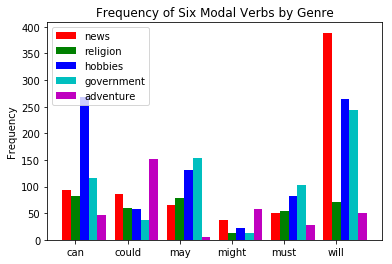

In [159]:
bar_chart(genres, modals, counts)

In [160]:
matplotlib.use('Agg')

In [161]:
pylab.savefig('modals.png')

<Figure size 432x288 with 0 Axes>

In [162]:
print('Content-Type: text/html')

Content-Type: text/html


In [163]:
print('<html><body>')

<html><body>


In [164]:
print('<img src="modals.png"/>')

<img src="modals.png"/>


In [165]:
print('</body></html>')

</body></html>


### NetworkX

The NetworkX package is for defining and manipulating structures consisting of nodes and edges, known as graphs. It is available from https://networkx.lanl.gov/.

In [179]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

In [180]:
def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

In [181]:
def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

In [182]:
def graph_draw(graph):
    nx.draw_networkx(
        graph,
        node_size=[16 * graph.degree(n) for n in graph],
        node_color=[graph.depth[n] for n in graph],
        with_labels=False
    )
    matplotlib.pyplot.show()

In [183]:
dog = wn.synset('dog.n.01')

In [184]:
graph = hyponym_graph(dog)

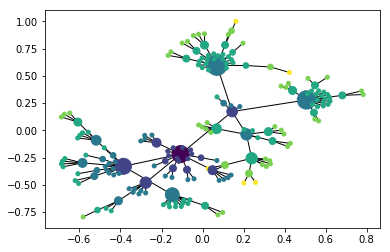

In [185]:
graph_draw(graph)

### csv

Language analysis work often involves data tabulations, containing information about lexical items, the participants in an empirical study, or the linguistic features extracted from a corpus.

In [186]:
import csv

In [ ]:
input_file = open("lexicon.csv", "rb")

In [ ]:
for row in csv.reader(input_file):
    print row

### NumPy

The NumPy package provides substantial support for numerical processing in Python. NumPy has a multidimensional array object, which is easy to initialize and access:

In [189]:
from numpy import array

In [190]:
cube = array([[[0, 0, 0], [1, 1, 1], [2, 2, 2]],
              [[3, 3, 3], [4, 4, 4], [5, 5, 5]],
              [[6, 6, 6], [7, 7, 7], [8, 8, 8]]])

In [191]:
cube[1,1,1]

4

In [192]:
cube[2].transpose()

array([[6, 7, 8],
       [6, 7, 8],
       [6, 7, 8]])

In [193]:
cube[2,1:]

array([[7, 7, 7],
       [8, 8, 8]])

In [194]:
from numpy import linalg

a = array([[4, 0], [3, -5]])
u, s, vt = linalg.svd(a)
u

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])

In [195]:
s

array([6.32455532, 3.16227766])

In [196]:
vt

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])